# Capstone Project: Use of Force

## Abstract

## Import Packages

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import category_encoders as ce

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import re
from collections import OrderedDict

In [2]:
# Create dataframe using IMPD use of foce csv file
uof_df = pd.read_csv('IMPD_Use_Of_Force.csv')
uof_df.head(25)

,OBJECTID,INCNUM,OCCURRED_DT,OCCURRED_TM,UDTEXT24A,UDTEXT24B,UDTEXT24C,UDTEXT24D,DISPOSITION,STREET_N,...,RACE,SEX,CIT_AGE,CIT_COND_TYPE,OFFNUM,OFF_RACE,OFF_SEX,OFF_AGE,OFF_YR_EMPLOY,OFF_COND_TYPE
0,1,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
1,2,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
2,3,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
3,4,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
4,5,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3848.0,White,Female,NaN,NaN,NaN
5,6,22933,2017/09/12,11:30:00,OPERATIONS DIVISION,SOUTHWEST DISTRICT,SW DAY SHIFT,SW DAY SHIFT,In compliance,2920,...,Black,Male,23.0,NaN,828.0,White,Male,38.0,15.0,NaN
6,7,166,2014/01/01,22:28:00,Homeland Security Division,Homeland Security Bureau/Tactical,Canine Section,Canine Unit - Late Tactical,In compliance,615,...,Black,Male,19.0,NaN,1519.0,White,Male,35.0,11.0,NaN
7,8,41996,2019/10/22,05:50:00,OPERATIONS DIVISION,NORTHWEST DISTRICT,NW DAY SHIFT,NW DAY SHIFT,In compliance,1416,...,Black,Male,45.0,Minor Scrapes,3113.0,White,Male,NaN,NaN,No injuries noted or visible
8,9,41996,2019/10/22,05:50:00,OPERATIONS DIVISION,NORTHWEST DISTRICT,NW DAY SHIFT,NW DAY SHIFT,In compliance,1416,...,Black,Male,45.0,Minor Scrapes,3113.0,White,Male,NaN,NaN,No injuries noted or visible
9,10,5474,2014/11/09,00:52:00,OPERATIONS DIVISION,NORTH DISTRICT,ND LATE SHIFT,NaN,In compliance,4049,...,White,Male,NaN,NaN,3110.0,White,Male,40.0,6.0,NaN


## Data Wrangling

### Wrangling Process

In [3]:
uof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99659 entries, 0 to 99658
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         99659 non-null  int64  
 1   INCNUM           99659 non-null  int64  
 2   OCCURRED_DT      99436 non-null  object 
 3   OCCURRED_TM      97956 non-null  object 
 4   UDTEXT24A        99659 non-null  object 
 5   UDTEXT24B        99659 non-null  object 
 6   UDTEXT24C        99427 non-null  object 
 7   UDTEXT24D        26716 non-null  object 
 8   DISPOSITION      94989 non-null  object 
 9   STREET_N         97329 non-null  object 
 10  STREET           97702 non-null  object 
 11  STREET_T         95797 non-null  object 
 12  STREET_G         68843 non-null  object 
 13  CITY             99097 non-null  object 
 14  UOF_FORCE_TYPE   97467 non-null  object 
 15  UOF_REASON       99547 non-null  object 
 16  SERVICE_TYPE     99559 non-null  object 
 17  CIT_ARRESTED

As can be seen above, the data set consists of 33 columns. Using the OBJECTID column as an indictor I can see that my dataframe contains 99,659 entries. I also notice that there are a range of different data types, missing values, and potentially, collumns that can either be dropped or engineered.

In [4]:
# First step is to lower case all columns for consistency and easy data manipulation
uof_df.columns = map(str.lower, uof_df.columns)
uof_df.head()

,objectid,incnum,occurred_dt,occurred_tm,udtext24a,udtext24b,udtext24c,udtext24d,disposition,street_n,...,race,sex,cit_age,cit_cond_type,offnum,off_race,off_sex,off_age,off_yr_employ,off_cond_type
0,1,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
1,2,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
2,3,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
3,4,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3232.0,White,Female,NaN,NaN,NaN
4,5,41251,2019/09/26,12:45:00,OPERATIONS DIVISION,EAST DISTRICT,ED DAY SHIFT,ED DAY SHIFT,In compliance,6204,...,Black,Male,32.0,NaN,3848.0,White,Female,NaN,NaN,NaN


In [5]:
# Now, lower case all columns containing strings in the dataset
uof_df = uof_df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
uof_df.head()

,objectid,incnum,occurred_dt,occurred_tm,udtext24a,udtext24b,udtext24c,udtext24d,disposition,street_n,...,race,sex,cit_age,cit_cond_type,offnum,off_race,off_sex,off_age,off_yr_employ,off_cond_type
0,1,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
1,2,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
2,3,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
3,4,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
4,5,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,...,black,male,32.0,NaN,3848.0,white,female,NaN,NaN,NaN


In [6]:
# Drop unneeded columns
# objectid dropped because it is a generic number for the data within the row
# cit_weapon_type consists entirely of NaN values
uof_df = uof_df.drop(uof_df[['objectid', 'cit_weapon_type']], axis=1)
uof_df.head()

,incnum,occurred_dt,occurred_tm,udtext24a,udtext24b,udtext24c,udtext24d,disposition,street_n,street,...,race,sex,cit_age,cit_cond_type,offnum,off_race,off_sex,off_age,off_yr_employ,off_cond_type
0,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
1,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
2,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
3,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
4,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3848.0,white,female,NaN,NaN,NaN


In [7]:
# Since there are also duplicate rows in the dataset I need to remove these excess rows
# I will use the following columns in order to sort through duplicates
uof_df = uof_df.drop_duplicates(subset=['incnum', 'citcharge_type', 'offnum'])
uof_df.head(50)

,incnum,occurred_dt,occurred_tm,udtext24a,udtext24b,udtext24c,udtext24d,disposition,street_n,street,...,race,sex,cit_age,cit_cond_type,offnum,off_race,off_sex,off_age,off_yr_employ,off_cond_type
0,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
4,41251,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,...,black,male,32.0,NaN,3848.0,white,female,NaN,NaN,NaN
5,22933,2017/09/12,11:30:00,operations division,southwest district,sw day shift,sw day shift,in compliance,2920,campanile,...,black,male,23.0,NaN,828.0,white,male,38.0,15.0,NaN
6,166,2014/01/01,22:28:00,homeland security division,homeland security bureau/tactical,canine section,canine unit - late tactical,in compliance,615,29th,...,black,male,19.0,NaN,1519.0,white,male,35.0,11.0,NaN
7,41996,2019/10/22,05:50:00,operations division,northwest district,nw day shift,nw day shift,in compliance,1416,27th,...,black,male,45.0,minor scrapes,3113.0,white,male,NaN,NaN,no injuries noted or visible
8,41996,2019/10/22,05:50:00,operations division,northwest district,nw day shift,nw day shift,in compliance,1416,27th,...,black,male,45.0,minor scrapes,3113.0,white,male,NaN,NaN,no injuries noted or visible
9,5474,2014/11/09,00:52:00,operations division,north district,nd late shift,NaN,in compliance,4049,34th,...,white,male,NaN,NaN,3110.0,white,male,40.0,6.0,NaN
10,36754,2019/05/24,15:50:00,operations division,northwest district,nw middle shift,NaN,in compliance,3902,high school,...,black,male,26.0,minor scrapes,3469.0,hispanic,male,31.0,3.0,no injuries noted or visible
16,36754,2019/05/24,15:50:00,operations division,northwest district,nw middle shift,NaN,in compliance,3902,high school,...,black,male,26.0,minor scrapes,3469.0,hispanic,male,31.0,3.0,no injuries noted or visible
22,4269,2014/08/07,17:30:00,operations division,park rangers,park ranger section,park ranger unit (evening),in compliance,520,belleview,...,black,male,NaN,no injuries noted or visible,3169.0,black,male,42.0,5.0,NaN


In [8]:
uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incnum          40744 non-null  int64  
 1   occurred_dt     40613 non-null  object 
 2   occurred_tm     40082 non-null  object 
 3   udtext24a       40744 non-null  object 
 4   udtext24b       40744 non-null  object 
 5   udtext24c       40628 non-null  object 
 6   udtext24d       12445 non-null  object 
 7   disposition     38380 non-null  object 
 8   street_n        39580 non-null  object 
 9   street          39755 non-null  object 
 10  street_t        38761 non-null  object 
 11  street_g        28103 non-null  object 
 12  city            40470 non-null  object 
 13  uof_force_type  38864 non-null  object 
 14  uof_reason      40668 non-null  object 
 15  service_type    40671 non-null  object 
 16  cit_arrested    40741 non-null  object 
 17  citcharge_type  38619 non-null 

In [9]:
# Since incnum column is no longer needed I will drop it from the dataset
uof_df = uof_df.drop(uof_df[['incnum']], axis=1)
uof_df.head()

,occurred_dt,occurred_tm,udtext24a,udtext24b,udtext24c,udtext24d,disposition,street_n,street,street_t,...,race,sex,cit_age,cit_cond_type,offnum,off_race,off_sex,off_age,off_yr_employ,off_cond_type
0,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,street,...,black,male,32.0,NaN,3232.0,white,female,NaN,NaN,NaN
4,2019/09/26,12:45:00,operations division,east district,ed day shift,ed day shift,in compliance,6204,commodore,street,...,black,male,32.0,NaN,3848.0,white,female,NaN,NaN,NaN
5,2017/09/12,11:30:00,operations division,southwest district,sw day shift,sw day shift,in compliance,2920,campanile,drive,...,black,male,23.0,NaN,828.0,white,male,38.0,15.0,NaN
6,2014/01/01,22:28:00,homeland security division,homeland security bureau/tactical,canine section,canine unit - late tactical,in compliance,615,29th,street,...,black,male,19.0,NaN,1519.0,white,male,35.0,11.0,NaN
7,2019/10/22,05:50:00,operations division,northwest district,nw day shift,nw day shift,in compliance,1416,27th,street,...,black,male,45.0,minor scrapes,3113.0,white,male,NaN,NaN,no injuries noted or visible


Now that the unneeded columns have been dropped and the duplicate rows have been removed using the incident number, civilian charge type, and officer badge number as a guide, I need to work with each of the remaining columns in order to replace NaN values change data types, and feature engineer new columns.

### Datetime Processing

In [10]:
# First, let's combine the occured_dt and occurred_tm columns into one datetime collumn
uof_df['datetime'] = pd.to_datetime(uof_df['occurred_dt']+' '+uof_df['occurred_tm'])

uof_df['datetime'].head()

0   2019-09-26 12:45:00
4   2019-09-26 12:45:00
5   2017-09-12 11:30:00
6   2014-01-01 22:28:00
7   2019-10-22 05:50:00
Name: datetime, dtype: datetime64[ns]

In [11]:
# Let's drop occurred_dt and occurred_tm from the dataframe
uof_df = uof_df.drop(uof_df[['occurred_dt', 'occurred_tm']], axis=1)

uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   udtext24a       40744 non-null  object        
 1   udtext24b       40744 non-null  object        
 2   udtext24c       40628 non-null  object        
 3   udtext24d       12445 non-null  object        
 4   disposition     38380 non-null  object        
 5   street_n        39580 non-null  object        
 6   street          39755 non-null  object        
 7   street_t        38761 non-null  object        
 8   street_g        28103 non-null  object        
 9   city            40470 non-null  object        
 10  uof_force_type  38864 non-null  object        
 11  uof_reason      40668 non-null  object        
 12  service_type    40671 non-null  object        
 13  cit_arrested    40741 non-null  object        
 14  citcharge_type  38619 non-null  object        
 15  ci

In [12]:
# Now, let's look at Datetime and see if it has missing values
uof_df['datetime'].isnull().value_counts()

False    39983
True       761
Name: datetime, dtype: int64

In [13]:
# Create a new column for weekday
uof_df['occurred_wd'] = uof_df['datetime'].dt.day_name()

uof_df['occurred_wd']

0         Thursday
4         Thursday
5          Tuesday
6        Wednesday
7          Tuesday
           ...    
99649     Thursday
99650     Thursday
99651     Thursday
99655     Thursday
99657     Thursday
Name: occurred_wd, Length: 40744, dtype: object

In [14]:
# Check for missing values
uof_df['occurred_wd'].isnull().value_counts()

False    39983
True       761
Name: occurred_wd, dtype: int64

In [15]:
# Put missing values in an other column
uof_df['occurred_wd'] = uof_df['occurred_wd'].replace(np.NaN, 'other')
uof_df['occurred_wd'].value_counts()

Sunday       6407
Saturday     6253
Friday       5752
Wednesday    5729
Tuesday      5436
Thursday     5279
Monday       5127
other         761
Name: occurred_wd, dtype: int64

In [16]:
uof_df['occurred_month'] = uof_df['datetime'].dt.month_name()

uof_df['occurred_month'].head() 

0    September
4    September
5    September
6      January
7      October
Name: occurred_month, dtype: object

In [17]:
# Let's do the same for the month column's NaN values
uof_df['occurred_month'] = uof_df['occurred_month'].replace(np.NaN, 'other')
uof_df['occurred_month'].value_counts()

November     3758
October      3745
August       3715
December     3605
May          3445
September    3439
February     3431
March        3272
January      3156
July         3130
April        2750
June         2537
other         761
Name: occurred_month, dtype: int64

### Uniformed Officer Designation

This section of data breaks the uniformed officers into various sub divisons within the IMPD. In this section I will reduce the amount of dimensions by creating an other class to reduce dimensionality, replace NaN values and merge the columns to produce one Divisional column.

In [18]:
# Replace NaN values in udtext24c and d with '' since position does not exist
uof_df['udtext24c'] = uof_df['udtext24c'].replace(np.NaN, '')

uof_df['udtext24d'] = uof_df['udtext24d'].replace(np.NaN, '')

In [19]:
# Combine all four udtext24 into one designation column for officers
uof_df["uo_designation"] = uof_df.filter(like='udtext24').astype(str).apply(' '.join, 1)

uof_df["uo_designation"]       

0        operations division east district ed day shift...
4        operations division east district ed day shift...
5        operations division southwest district sw day ...
6        homeland security division homeland security b...
7        operations division northwest district nw day ...
                               ...                        
99649    operations division northwest district nw midd...
99650     operations division east district ed late shift 
99651     operations division east district ed late shift 
99655     operations division east district ed late shift 
99657     operations division east district ed late shift 
Name: uo_designation, Length: 40744, dtype: object

In [20]:
# Remove repeating designation terms
uof_df["uo_designation"] = (uof_df["uo_designation"] .str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))

uof_df["uo_designation"][6]

'homeland security division bureau/tactical canine section unit - late tactical'

Great. All duplicates have been removed from the newly created uo_designation column. However, now I need to reduce the dimensionality of the column. I will take those elements that make up less than 1% of the data and replace them with other designation.

In [21]:
uo_designation_vc = pd.value_counts(uof_df['uo_designation'])
uo_designation_pct = (uo_designation_vc/uo_designation_vc.sum() * 100).lt(1)
uof_df['uo_designation'] = np.where(uof_df['uo_designation'].isin(uo_designation_vc[uo_designation_pct].index),'other designation',uof_df['uo_designation'])

uof_df['uo_designation'].value_counts()

other designation                                                                 7780
operations division east district ed middle shift                                 3976
operations division east district ed late shift                                   3863
operations division northwest district nw middle shift                            2690
operations division southwest district sw late shift                              2630
operations division north district nd middle shift                                2425
operations division north district nd late shift                                  2125
operations division northwest district nw late shift                              1805
operations division southwest district sw middle shift                            1710
operations division southeast district se middle shift                            1696
operations division southeast district se late shift                              1695
operations division downtown district dt la

In [22]:
# Now I need to drop the udtext24 columns from the dataframe
uof_df = uof_df.drop(uof_df[['udtext24a', 'udtext24b', 'udtext24c', 'udtext24d']], axis=1)

uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   disposition     38380 non-null  object        
 1   street_n        39580 non-null  object        
 2   street          39755 non-null  object        
 3   street_t        38761 non-null  object        
 4   street_g        28103 non-null  object        
 5   city            40470 non-null  object        
 6   uof_force_type  38864 non-null  object        
 7   uof_reason      40668 non-null  object        
 8   service_type    40671 non-null  object        
 9   cit_arrested    40741 non-null  object        
 10  citcharge_type  38619 non-null  object        
 11  cit_injured     40736 non-null  object        
 12  cit_hospital    40736 non-null  object        
 13  off_injured     40736 non-null  object        
 14  off_hospital    40736 non-null  object        
 15  ci

### Uniformed Officer Disposition

In [23]:
uof_df['disposition'].value_counts()

in compliance             38279
not in compliance            70
inactive                     14
finalized                    12
entry completed               3
f.c. converted to c.c.        2
Name: disposition, dtype: int64

In [24]:
uof_df['disposition'] = uof_df['disposition'].replace(np.NaN, 'other')

uof_df['disposition'].value_counts()

in compliance             38279
other                      2364
not in compliance            70
inactive                     14
finalized                    12
entry completed               3
f.c. converted to c.c.        2
Name: disposition, dtype: int64

### Incident Location

In [25]:
uof_df['city'].value_counts()

indianapolis     39075
indpls             470
indianpolis        283
indinapolis         42
beech grove         41
                 ...  
danville             1
indianapoliis        1
carmel               1
mobile               1
rocky ripple         1
Name: city, Length: 78, dtype: int64

Indianapolis is either misspelled or shortened. I need to fix this in order to better create an Address feature

In [26]:
uof_df['city'] = uof_df['city'].replace('indpls', 'indianapolis').replace('indianpolis', 'indianapolis').replace('indianpolis', 'indianapolis').replace('indinapolis', 'indianapolis').replace('indianapoli', 'indianapolis').replace('indiana', 'indianapolis').replace('indianapols', 'indianapolis').replace('indianaplis', 'indianapolis').replace('indianapois', 'indianapolis').replace('indian', 'indianapolis').replace('indianapolid', 'indianapolis').replace('indy', 'indianapolis').replace('indianapoils', 'indianapolis').replace('iindianapolis', 'indianapolis').replace('iindianapolis', 'indianapolis').replace('indianapolos', 'indianapolis').replace('indiapolis', 'indianapolis').replace('ind', 'indianapolis').replace('indianaolis', 'indianapolis').replace('indols', 'indianapolis').replace('indianapolisq', 'indianapolis').replace('indanapolis', 'indianapolis').replace('indianplis', 'indianapolis').replace('indianaoplis', 'indianapolis').replace('indaianpolis', 'indianapolis').replace('indaianpolis', 'indianapolis').replace('indianaplois', 'indianapolis').replace('indianapoliks', 'indianapolis').replace('inidianapolis', 'indianapolis').replace('inpls', 'indianapolis').replace('indinaapolis', 'indianapolis').replace('indianapolils', 'indianapolis').replace('indianapoolis', 'indianapolis').replace('indianapolis`', 'indianapolis').replace('indiaapolis', 'indianapolis').replace('indlps', 'indianapolis').replace('indiananapolis', 'indianapolis').replace('indianapoluis', 'indianapolis').replace('indianapoiis', 'indianapolis').replace('indinanapolis', 'indianapolis').replace('indianapoins', 'indianapolis').replace('idianapolis', 'indianapolis').replace('inddianapolis', 'indianapolis').replace('indisanapoli', 'indianapolis').replace('indiananpolis', 'indianapolis').replace('indianapolii', 'indianapolis').replace('indianapoplis', 'indianapolis').replace('indianapollis', 'indianapolis').replace('indainapolis', 'indianapolis').replace('indiana[olis', 'indianapolis').replace('injdianapolis', 'indianapolis').replace('inianapolis', 'indianapolis').replace('indianapolsi', 'indianapolis').replace('indianapolsi', 'indianapolis').replace('indianapoliis', 'indianapolis').replace('indiaanapolis', 'indianapolis')  

In [27]:
uof_df['address'] = uof_df["street_n"].map(str) + " " + \
uof_df["street"].map(str) + " " + \
uof_df["street_t"].map(str) + " " + \
uof_df["street_g"].map(str) + " " + \
uof_df["city"] + " " + 'indiana'

uof_df['address']

0        6204 commodore street nan indianapolis indiana
4        6204 commodore street nan indianapolis indiana
5         2920 campanile drive nan indianapolis indiana
6                615 29th street w indianapolis indiana
7               1416 27th street w indianapolis indiana
                              ...                      
99649              nan nan nan nan indianapolis indiana
99650              nan nan nan nan indianapolis indiana
99651              nan nan nan nan indianapolis indiana
99655              nan nan nan nan indianapolis indiana
99657              nan nan nan nan indianapolis indiana
Name: address, Length: 40744, dtype: object

In [28]:
uof_df["address"].replace("nan", "", inplace=True, regex=True)

uof_df['address']

0        6204 commodore street  indianapolis indiana
4        6204 commodore street  indianapolis indiana
5         2920 campanile drive  indianapolis indiana
6             615 29th street w indianapolis indiana
7            1416 27th street w indianapolis indiana
                            ...                     
99649                           indianapolis indiana
99650                           indianapolis indiana
99651                           indianapolis indiana
99655                           indianapolis indiana
99657                           indianapolis indiana
Name: address, Length: 40744, dtype: object

In [29]:
# Remove Street and city columns since they have been used to create adress column

uof_df = uof_df.drop(uof_df[["street_n", "street", "street_t", "street_g", "city"]], axis=1)

uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   disposition     40744 non-null  object        
 1   uof_force_type  38864 non-null  object        
 2   uof_reason      40668 non-null  object        
 3   service_type    40671 non-null  object        
 4   cit_arrested    40741 non-null  object        
 5   citcharge_type  38619 non-null  object        
 6   cit_injured     40736 non-null  object        
 7   cit_hospital    40736 non-null  object        
 8   off_injured     40736 non-null  object        
 9   off_hospital    40736 non-null  object        
 10  citnum          40744 non-null  int64         
 11  race            40219 non-null  object        
 12  sex             40731 non-null  object        
 13  cit_age         38515 non-null  float64       
 14  cit_cond_type   35080 non-null  object        
 15  of

### Use of Force Type and Reason

In [30]:
uof_df['uof_force_type'].value_counts()

physical-weight leverage    7578
physical-handcuffing        5882
physical-take down          5497
less lethal-taser           3545
physical-other              2738
physical-joint/pressure     2130
physical-leg sweep          1695
canine bite                 1550
physical-knee strike        1405
physical-fist strike        1181
lethal-handgun              1078
less lethal-cs/oc           1039
physical-palm strike         493
physical-kick                435
hands, fist, feet            367
taser                        275
physical-elbow strike        226
body weight leverage         209
less lethal-bean bag         203
less lethal-pepperball       181
handcuffing                  177
joint manipulation           145
less lethal-other            141
less lethal-baton            141
less lethal-cs fogger        123
less lethal-burning cs       120
personal cs/oc spray          53
less lethal-bps gas           52
pointing a firearm            45
less lethal-clearout oc       41
lethal-rif

Looking at these use of force types, I can see that they can be placed into similar classes. Doing this will help to reduce the dimensionality, as well as make the data easier to process later on since this column will be used as my target variable. I will create three categories - physical, less lethal, and lethal.

In [31]:
# Organize physical force methods into physical force types
uof_df['uof_force_type'] = uof_df['uof_force_type'].replace('physical-weight leverage', 'physical').replace('physical-handcuffing', 'physical').replace('physical-take down', 'physical').replace('physical-other', 'physical').replace('physical-joint/pressure', 'physical').replace('physical-leg sweep', 'physical').replace('canine bite', 'physical').replace('physical-knee strike', 'physical').replace('physical-fist strike', 'physical').replace('physical-palm strike', 'physical').replace('physical-kick', 'physical').replace('hands, fist, feet', 'physical').replace('physical-elbow strike', 'physical').replace('body weight leverage', 'physical').replace('handcuffing', 'physical').replace('joint manipulation', 'physical').replace('physical-push', 'physical').replace('physical-push', 'physical')
uof_df['uof_force_type'].value_counts()

physical                   31716
less lethal-taser           3545
lethal-handgun              1078
less lethal-cs/oc           1039
taser                        275
less lethal-bean bag         203
less lethal-pepperball       181
less lethal-baton            141
less lethal-other            141
less lethal-cs fogger        123
less lethal-burning cs       120
personal cs/oc spray          53
less lethal-bps gas           52
pointing a firearm            45
less lethal-clearout oc       41
lethal-rifle                  41
less lethal-cs grenade        20
lethal-vehicle                14
less lethal-flash bang        12
lethal-shotgun                 8
baton                          6
pepper ball                    4
bean bag                       3
other impact weapon            2
cs fogger                      1
Name: uof_force_type, dtype: int64

In [32]:
# Organize less lethal force methods into less lethal force types
uof_df['uof_force_type'] = uof_df['uof_force_type'].replace('less lethal-taser', 'less lethal').replace('less lethal-cs/oc', 'less lethal').replace('taser', 'less lethal').replace('less lethal-bean bag', 'less lethal').replace('less lethal-pepperball', 'less lethal').replace('less lethal-baton', 'less lethal').replace('less lethal-other', 'less lethal').replace('less lethal-cs fogger', 'less lethal').replace('less lethal-burning cs', 'less lethal').replace('personal cs/oc spray', 'less lethal').replace('less lethal-bps gas', 'less lethal').replace('less lethal-clearout oc', 'less lethal').replace('less lethal-cs grenade', 'less lethal').replace('less lethal-flash bang', 'less lethal').replace('baton', 'less lethal').replace('pepper ball', 'less lethal').replace('bean bag', 'less lethal').replace('other impact weapon', 'less lethal').replace('cs fogger', 'less lethal')
uof_df['uof_force_type'].value_counts()

physical              31716
less lethal            5962
lethal-handgun         1078
pointing a firearm       45
lethal-rifle             41
lethal-vehicle           14
lethal-shotgun            8
Name: uof_force_type, dtype: int64

In [33]:
# Organize lethal force methods into lethal force types
uof_df['uof_force_type'] = uof_df['uof_force_type'].replace('lethal-handgun', 'lethal').replace('pointing a firearm', 'lethal').replace('lethal-rifle', 'lethal').replace('lethal-vehicle', 'lethal').replace('lethal-shotgun', 'lethal')
uof_df['uof_force_type'].value_counts()

physical       31716
less lethal     5962
lethal          1186
Name: uof_force_type, dtype: int64

In [34]:
# Look at missing values
uof_df['uof_force_type'].isna().value_counts()

False    38864
True      1880
Name: uof_force_type, dtype: int64

Since the majority of the data is a physical altercation, let's take our NaN values and assume that they were physical use of force incidents.

In [35]:
# Replace NaN values with physical
uof_df['uof_force_type'] = uof_df['uof_force_type'].replace(np.NaN, 'physical')
uof_df['uof_force_type'].value_counts()

physical       33596
less lethal     5962
lethal          1186
Name: uof_force_type, dtype: int64

In [36]:
#Now, let's look at the reason for the use of force
uof_df['uof_reason'].value_counts()

resisting arrest            16439
non-compliant                8697
combative suspect            6176
fleeing                      3891
assaulting officer(s)        3406
felony stop/apprehension     1012
assaulting citizen(s)         929
canine incident               118
Name: uof_reason, dtype: int64

Majority of the reasons for use of force are resisting arrest, followed by non-compliant, and finally combatice suspect. Now I will take a look at the missing values.

In [37]:
uof_df['uof_reason'] = uof_df['uof_reason'].replace(np.NaN, 'resisting_arrest')
uof_df['uof_reason'].value_counts()

resisting arrest            16439
non-compliant                8697
combative suspect            6176
fleeing                      3891
assaulting officer(s)        3406
felony stop/apprehension     1012
assaulting citizen(s)         929
canine incident               118
resisting_arrest               76
Name: uof_reason, dtype: int64

In [38]:
uof_df['uof_reason'].isna().value_counts()

False    40744
Name: uof_reason, dtype: int64

In [39]:
uof_df['service_type'].value_counts()

arrest                      22460
call for service             8162
investigation                3039
traffic stop                 2174
request for psd               817
off-duty employment           677
assisting a citizen           634
swat incident                 607
warrant service               607
self-initiated activity       544
assisting other agency        466
erg incident                  229
search warrant                187
not applicable                 66
assisting another agency        2
Name: service_type, dtype: int64

Perform same method for service type and label NaN values as arrest. I will also combine some elements here such as warrant service and search warrant.

In [40]:
type(uof_df['uof_reason'])

pandas.core.series.Series

In [41]:
# Replace NaN values with arrest
uof_df['service_type'] = uof_df['service_type'].replace(np.NaN, 'arrest')

# Replace search warrant with warrant service in order to add to element
uof_df['service_type'] = uof_df['service_type'].replace('search warrant', 'warrant service')

# assisting another agency with assisting another agency to add to element
uof_df['service_type'] = uof_df['service_type'].replace('assisting another agency', 'assisting other agency')

uof_df['service_type'].value_counts()

arrest                     22533
call for service            8162
investigation               3039
traffic stop                2174
request for psd              817
warrant service              794
off-duty employment          677
assisting a citizen          634
swat incident                607
self-initiated activity      544
assisting other agency       468
erg incident                 229
not applicable                66
Name: service_type, dtype: int64

### Civilian

#### Civilian Arrested?

In [42]:
uof_df['cit_arrested'].value_counts()

yes    37860
no      2881
Name: cit_arrested, dtype: int64

In [43]:
# Replace NaN values with yes
uof_df['cit_arrested'] = uof_df['cit_arrested'].replace(np.NaN, 'yes')

# Convert to bool
a = {'yes':True, 'no': False}
uof_df['cit_arrested'] = uof_df['cit_arrested'].map(a)

# Convert to int
#uof_df['cit_arrested'] = uof_df['cit_arrested'].astype(np.int64)


In [44]:
uof_df['cit_arrested']

0        False
4        False
5         True
6         True
7         True
         ...  
99649    False
99650     True
99651     True
99655     True
99657     True
Name: cit_arrested, Length: 40744, dtype: bool

In [45]:
uof_df['citcharge_type'].value_counts().head(50)

resisting law enforcement (m)                    9633
battery (f)                                      2752
disorderly conduct                               2540
resisting law enforcement (f)                    2534
battery (m)                                      1977
public intoxication                              1644
immediate detention                              1420
criminal trespass                                1128
possession of marijuana/hash (m)                 1050
warrant arrest                                   1015
intimidation                                      969
theft/receiving stolen property                   875
possession of paraphernalia                       782
possession of a handgun (f)                       643
domestic battery (m)                              581
possession of controlled substance                580
domestic battery (f)                              510
criminal recklessness                             482
driving while suspended     

In [46]:
# resisting arrest
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('resisting law enforcement (m)', 'resisting arrest').replace('resisting law enforcement (f)', 'resisting arrest').replace('resisting law enforcement (ma)', 'resisting arrest').replace('resisting law enforcement (md)', 'resisting arrest').replace('resisting law enforcement (fd)', 'resisting arrest')

# assault and battery
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('battery (f)', 'assault and battery').replace('battery (m)', 'assault and battery').replace('domestic battery (m)', 'assault and battery').replace('domestic battery (f)', 'assault and battery').replace('battery by bodily waste', 'assault and battery').replace('aggravated assault', 'assault and battery').replace('battery (f)', 'assault and battery').replace('strangulation', 'assault and battery').replace('battery (ma)', 'assault and battery')

# theft
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('theft/receiving stolen property', 'theft').replace('stolen vehicle', 'theft').replace('robbery', 'theft').replace('shoplifting - theft', 'theft').replace('armed robbery', 'theft').replace('fraud', 'theft').replace('forgery', 'theft').replace('theft/receiving stolen property (fd)', 'theft').replace('strong armed robbery', 'theft').replace('criminal conversion', 'theft').replace('burglary', 'theft')

# drug possession and use
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('dealing in a schedule or controlled substance', 'drug possession and use').replace('possession of marijuana/hash (m)', 'drug possession and use').replace('possession of paraphernalia', 'drug possession and use').replace('possession of controlled substance', 'drug possession and use').replace('possession of cocaine (f)', 'drug possession and use').replace('possession of cocaine (m)', 'drug possession and use').replace('possession of methamphetamine', 'drug possession and use').replace('dealing marijuana', 'drug possession and use').replace('dealing in a schedule or controlled substance ', 'drug possession and use').replace('dealing cocaine', 'drug possession and use').replace('possession of marijuana/hash (f)', 'drug possession and use').replace('dealing in methamphetamine', 'drug possession and use').replace('possession of cocaine (fd)', 'drug possession and use').replace('possession of marijuana/hash (ma)', 'drug possession and use')

# weapon possession
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('possession of a handgun (f)', 'weapon possession').replace('possession of a handgun (m)', 'weapon possession').replace('pointing a firearm (m)', 'weapon possession').replace('pointing a firearm (f)', 'weapon possession')

# disorderly conduct
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('public intoxication', 'disorderly conduct').replace('public indecency', 'disorderly conduct').replace('public intoxication (mb)', 'disorderly conduct')

# leaving scene of crime
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('escape', 'leaving scene of crime').replace('leaving the scene of a pd crash', 'leaving scene of crime').replace('leaving the scene of a pi crash', 'leaving scene of crime')

# murder
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('attempted murder', 'murder').replace('reckless homicide', 'murder')

# vehicular crime
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('carjacking', 'vehicular crime').replace('operating a vehicle while intoxicated (m)', 'vehicular crime').replace('operating a vehicle while intoxicated (f)', 'vehicular crime').replace('operating a vehicle with a bac .15% or higher (m)', 'vehicular crime').replace('operating a vehicle with a bac .15% or higher (f)', 'vehicular crime').replace('operating a vehicle with a bac .08% to .15% (m)', 'vehicular crime').replace('operating a vehicle with a bac .08% to .15% (f)', 'vehicular crime').replace('joyriding', 'vehicular crime').replace('driving while suspended', 'vehicular crime').replace('habitual traffic violator', 'vehicular crime')

# sex crime
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('rape', 'sex crime').replace('prostitution (m)', 'sex crime').replace('prostitution (f)', 'sex crime').replace('child molestation', 'sex crime').replace('sexual misconduct with a minor', 'sex crime')

# animal cruelty
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('cruelty to a police service animal', 'animal cruelty').replace('torturing or mutilating a vertebrate animal', 'animal cruelty')

# violation of protective order
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('violation of protective order (m)', 'violation of protective order').replace('violation of protective order (f)', 'violation of protective order')

# criminal mischief
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('criminal mischief (m)', 'criminal mischief').replace('criminal mischief (mb)', 'criminal mischief').replace('criminal mischief (f)', 'criminal mischief')

# trespass
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('criminal trespass', 'trespass').replace('residential entry', 'tresspass')

# Obstruction of Justice
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('disarming a law # Obstruction of Justiceenforcement officer', 'obstruction of justice').replace('interfering with reporting a crime', 'obstruction of justice').replace('false reporting', 'obstruction of justice')

# Immediate detention
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('mental writ', 'immediate detention')

# criminal confinement
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('kidnapping', 'criminal confinement')

# common nuisance
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace('visiting a common nuisance', 'common nuisance').replace('maintaining a common nuisance', 'common nuisance')

In [47]:
# Replace NaN values with other crimes
uof_df['citcharge_type'] = uof_df['citcharge_type'].replace(np.NaN, 'other crime')

uof_df['citcharge_type'].value_counts().head(75)

resisting arrest                       12181
assault and battery                     6589
disorderly conduct                      4276
drug possession and use                 3851
other crime                             2125
theft                                   1998
immediate detention                     1462
vehicular crime                         1192
weapon possession                       1134
trespass                                1128
warrant arrest                          1015
intimidation                             969
criminal mischief                        484
criminal recklessness                    482
leaving scene of crime                   481
criminal confinement                     347
tresspass                                310
obstruction of justice                   224
invasion of privacy                      151
disarming a law enforcement officer       63
common nuisance                           54
murder                                    45
sex crime 

In [48]:
# Reduce dimensionality 
citcharge_type_vc = pd.value_counts(uof_df['citcharge_type'])
citcharge_type_pct = (citcharge_type_vc/citcharge_type_vc.sum() * 100).lt(1)
uof_df['citcharge_type'] = np.where(uof_df['citcharge_type'].isin(citcharge_type_vc[citcharge_type_pct].index),'other crime',uof_df['citcharge_type'])

uof_df['citcharge_type'].value_counts()

resisting arrest           12181
assault and battery         6589
disorderly conduct          4276
drug possession and use     3851
other crime                 3502
theft                       1998
immediate detention         1462
vehicular crime             1192
weapon possession           1134
trespass                    1128
warrant arrest              1015
intimidation                 969
criminal mischief            484
criminal recklessness        482
leaving scene of crime       481
Name: citcharge_type, dtype: int64

In [49]:
# Look at civilian injurt values
uof_df['cit_injured'].value_counts()

no     26176
yes    14560
Name: cit_injured, dtype: int64

In [50]:
# Replace NaN values with no
uof_df['cit_injured'] = uof_df['cit_injured'].replace(np.NaN, 'no')

# Convert to bool
#uof_df['cit_injured'] = uof_df['cit_injured'].map(a)

# Convert to int
#uof_df['cit_injured'] = uof_df['cit_injured'].astype(np.int64)

uof_df['cit_injured'].head()

0     no
4     no
5     no
6    yes
7    yes
Name: cit_injured, dtype: object

In [51]:
# Let's look at civilian hospital value count
uof_df['cit_hospital'].value_counts()

no     27400
yes    13336
Name: cit_hospital, dtype: int64

In [52]:
# Perform same methods as other binary data types

# Replace NaN values with no
uof_df['cit_hospital'] = uof_df['cit_hospital'].replace(np.NaN, 'no')

# Convert to bool
# uof_df['cit_hospital'] = uof_df['cit_hospital'].map(a)

# Convert to int
# uof_df['cit_hospital'] = uof_df['cit_hospital'].astype(np.int64)

uof_df['cit_hospital'].head()

0     no
4     no
5    yes
6     no
7    yes
Name: cit_hospital, dtype: object

In [53]:
# Let's take a look at civilian number column
uof_df['citnum'].head(10)

0      163
4      163
5      230
6      230
7      231
8      231
9      883
10    1052
16    1052
22    1066
Name: citnum, dtype: int64

This is just a column of randomly generated values in the incident. Different civilians can have similar values. Let's drop this since it doesn't provide more info.

In [54]:
uof_df['citnum'] = uof_df.drop(uof_df[['citnum']], axis=1)

In [55]:
# Let's look at civilian race values
uof_df['race'].value_counts()

black          22601
white          14262
hispanic        1538
bi-racial       1435
unknown          132
asian            115
other            113
native amer       11
blace              9
b                  2
polynesian         1
Name: race, dtype: int64

I can clearly see many issues with this dataset. I am going to assume that blace and b were meant to be designated as black and place them in that column. Since polynesian and native american make up such a small percentage I will put these designations in the other category. I will also move the unknown category to other designation. Finally, all NaN values will be placed in the other race designation.

In [56]:
# black racial designation adjustment
uof_df['race'] = uof_df['race'].replace('blace', 'black').replace('b', 'black')

# other racial designation adjustment
uof_df['race'] = uof_df['race'].replace('unknown', 'other').replace('native amer', 'other').replace('polynesian', 'other').replace('hispanic', 'other').replace('asian', 'other').replace('bi-racial', 'other').replace(np.NaN, 'other')

uof_df['race'].value_counts()

black    22612
white    14262
other     3870
Name: race, dtype: int64

In [57]:
# Let's look at sex designations
uof_df['sex'].value_counts()

male       33120
female      7577
unknown       32
m              2
Name: sex, dtype: int64

In [58]:
# Let's also look at NaN values
uof_df['sex'].isna().value_counts()

False    40731
True        13
Name: sex, dtype: int64

Since male sex designation makes up the majority of the value set I will recategorize unknown, m, and NaN values into the male sex designation 

In [59]:
uof_df['sex'] = uof_df['sex'].replace('unknown', 'male').replace('m', 'male').replace(np.NaN, 'male')

uof_df['sex'].value_counts()

male      33167
female     7577
Name: sex, dtype: int64

In [60]:
uof_df.cit_age.describe()

count    38515.000000
mean        30.875114
std         10.795035
min          0.000000
25%         23.000000
50%         29.000000
75%         37.000000
max         83.000000
Name: cit_age, dtype: float64

In [61]:
uof_df.cit_age.median()

29.0

I can see that there are outliers, and that an age of 0 is an issue. Let's assign the NaN values to the median value. Then use quartiles to replace extreme outliers.

In [62]:
# recategorize NaN and 0 values using median value of 29
uof_df['cit_age'] = uof_df['cit_age'].replace(np.NaN, 29.0)

# convert to int
uof_df['cit_age'] = uof_df['cit_age'].astype(np.int64)

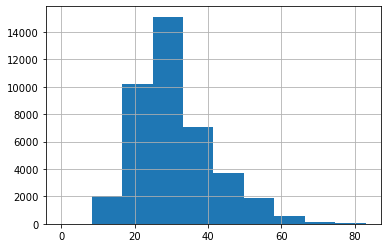

In [63]:
uof_df.cit_age.hist();

The age data has a slight right skew, but there are also ages of 1, 4 etc. in the dataset. I will use extreme quartile measures in order to replace this values with the median value.

In [64]:
print(uof_df['cit_age'].quantile(0.95))
print(uof_df['cit_age'].quantile(0.50)) 
print(uof_df['cit_age'].quantile(0.05))

51.0
29.0
17.0


In [65]:
#Replace outliers with median value

print(uof_df['cit_age'].quantile(0.50)) 
print(uof_df['cit_age'].quantile(0.05)) 
uof_df['cit_age'] = np.where(uof_df['cit_age'] < 17, 29, uof_df['cit_age'])
uof_df['cit_age'] = np.where(uof_df['cit_age'] > 51, 29, uof_df['cit_age'])
uof_df['cit_age'].describe()

29.0
17.0


count    40744.000000
mean        30.071986
std          7.766305
min         17.000000
25%         24.000000
50%         29.000000
75%         34.000000
max         51.000000
Name: cit_age, dtype: float64

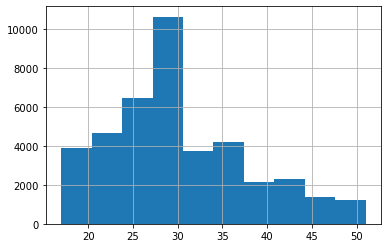

In [66]:
uof_df.cit_age.hist();

In [67]:
uof_df['cit_cond_type'].value_counts().head(50)

no injuries noted or visible    18988
minor scrapes                    4230
complaint of pain                3671
minor bleeding                   2866
laceration                       1661
canine bite                      1588
swelling                          578
bruising                          477
internal pain/discomfort          130
major scrapes                     121
broken tooth                      110
broken bone                        57
abrasion                           42
major bleeding                     37
taser probe                        35
unconsciousness                    33
taser probes                       33
dislocated bone                    26
fractured bone                     20
gunshot wound                      18
breathing complaint                15
taser probe with out entry         12
redness due to oc/cs               12
taser mark                         11
tazer probe strike                 10
finger nail marks                   9
redness     

In [68]:
# no injuries noted or visible
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('none', 'no injuries noted or visible').replace('no injury', 'no injuries noted or visible').replace('none; possible minor bleedin', 'no injuries noted or visible').replace('clothing only no injury', 'no injuries noted or visible')

# broken, fractured, and dislocated bones
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('broken tooth', 'broken, fractured, and dislocated bones').replace('broken bone', 'broken, fractured, and dislocated bones').replace('dislocated bone', 'broken, fractured, and dislocated bones').replace('fractured bone', 'broken, fractured, and dislocated bones').replace('busted tooth', 'broken, fractured, and dislocated bones')

# abrasions
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('minor scrapes', 'abrasions').replace('major scrapes', 'abrasions').replace('finger nail marks', 'abrasions').replace('loss of skin', 'abrasions').replace('loss of skin', 'abrasions').replace('scratches/scrapes', 'abrasions').replace('abrasion', 'abrasions').replace('abrasion to cheek', 'abrasions').replace('carpet burn', 'abrasions').replace('scratch to left cheek', 'abrasions').replace('abrassion', 'abrasions').replace('redness and skin damage', 'abrasions').replace('small minor scrapes', 'abrasions').replace('scratch to neck', 'abrasions')

# lacerations
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('laceration', 'lacerations').replace('busted lip', 'lacerations').replace('self sustained cut', 'lacerations').replace('small cut on nose', 'lacerations')

# taser wounds
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('taser probe', 'taser wounds').replace('taser probes', 'taser wounds').replace('taser probe with out entry', 'taser wounds').replace('taser mark', 'taser wounds').replace('tazer probe strike', 'taser wounds').replace('taser prongs', 'taser wounds').replace('taser', 'taser wounds').replace('taser strike', 'taser wounds').replace('tazer prongs', 'taser wounds').replace('taser prong', 'taser wounds').replace('taser marks', 'taser wounds').replace('prongs from taser cartridge', 'taser wounds').replace('taser prong in face', 'taser wounds').replace('taser prong punctures', 'taser wounds').replace('taser entry point', 'taser wounds').replace('taser prong entry points', 'taser wounds').replace('where taser prong entered', 'taser wounds').replace('puncture from tazer prong', 'taser wounds').replace('taser probe marks', 'taser wounds').replace('taser probes deployed', 'taser wounds').replace('taser prong puncture', 'taser prong puncture wounds').replace('taser probe punctures', 'taser prong puncture wounds').replace('small puncture from taser', 'taser prong puncture wounds').replace('puncture wound/taser probe', 'taser prong puncture wounds').replace('tazer probes', 'taser prong puncture wounds').replace('taser probe-abdomen area', 'taser prong puncture wounds').replace('probe mark', 'taser prong puncture wounds').replace('taser prong entry wound', 'taser prong puncture wounds').replace('probe entry points', 'taser prong puncture wounds').replace('taser probe strike', 'taser prong puncture wounds').replace('tazer', 'taser prong puncture wounds').replace('taser exposure', 'taser prong puncture wounds').replace('puncture from taser probe', 'taser prong puncture wounds').replace('probe strikes', 'taser prong puncture wounds').replace('tased', 'taser prong puncture wounds').replace('taser probe stuck', 'taser prong puncture wounds').replace('taser prong puncture wounds', 'taser prong puncture wounds').replace('probe strike', 'taser prong puncture wounds').replace('puncture wound', 'taser prong puncture wounds').replace('struck by taser', 'taser wounds').replace('taser probe hits', 'taser wounds').replace('puncture wound from probes', 'taser wounds').replace('taser probe inserted', 'taser wounds').replace('taser prong puncture wounds', 'taser wounds').replace('taser probe entry wound', 'taser wounds').replace('prong entry', 'taser wounds')

# breathing issues
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('breathing complaint', 'breathing issues').replace('trouble breathing', 'breathing issues')

# swelling and bruising 
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('swelling', 'swelling and bruising').replace('bruising', 'swelling and bruising').replace('redness', 'swelling and bruising').replace('small red mark', 'swelling and bruising').replace('small red mark on cheek', 'swelling and bruising')

# complaint of pain and discomfort
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('complaint of pain', 'complaint of pain and discomfort').replace('internal pain/discomfort', 'complaint of pain and discomfort').replace('shoulder pain', 'complaint of pain and discomfort').replace('numbness', 'complaint of pain and discomfort').replace('pain to right hand', 'complaint of pain and discomfort').replace('shoulder pain reported later', 'complaint of pain and discomfort')

# Weapon wound
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('gunshot wound', 'weapon wound').replace('knife wound', 'weapon wound')

# chemical weapon exposure
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('redness due to oc/cs', 'chemical weapon exposure').replace('oc/cs exposure', 'chemical weapon exposure').replace('cs spray', 'chemical weapon exposure').replace('gas inhalation', 'chemical weapon exposure').replace('chemical spray', 'chemical weapon exposure').replace('csoc', 'chemical weapon exposure').replace('oc spray to eyes', 'chemical weapon exposure').replace('pepper spray', 'chemical weapon exposure').replace('chenical spray exposure', 'chemical weapon exposure').replace('oc spray to face', 'chemical weapon exposure').replace('oc spray to face', 'chemical weapon exposure').replace('oc sprayed', 'chemical weapon exposure').replace('cs / oc sprayed', 'chemical weapon exposure')

# physical force wound
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('take down', 'physical force wound').replace('where female was grabbed', 'physical force wound').replace('pushed citizen back.', 'physical force wound').replace('kicks', 'physical force wound').replace('two braids pulled out', 'physical force wound')

# other
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('unknown', 'other').replace('unknwon', 'other')

# major and minor bleeding
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace('major bleeding', 'major and minor bleeding').replace('minor bleeding', 'major and minor bleeding')

In [69]:
# Reduce dimensionality 
cit_cond_type_vc = pd.value_counts(uof_df['cit_cond_type'])
cit_cond_type_pct = (cit_cond_type_vc/cit_cond_type_vc.sum() * 100).lt(1)
uof_df['cit_cond_type'] = np.where(uof_df['cit_cond_type'].isin(cit_cond_type_vc[cit_cond_type_pct].index),'other',uof_df['cit_cond_type'])

uof_df['cit_cond_type'].value_counts()

no injuries noted or visible        19001
abrasions                            4442
complaint of pain and discomfort     3819
major and minor bleeding             2903
lacerations                          1676
canine bite                          1588
swelling and bruising                1067
other                                 584
Name: cit_cond_type, dtype: int64

In [70]:
uof_df['cit_cond_type'] = uof_df['cit_cond_type'].replace(np.NaN, 'other')

### Uniformed Officer

In [71]:
uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   disposition     40744 non-null  object        
 1   uof_force_type  40744 non-null  object        
 2   uof_reason      40744 non-null  object        
 3   service_type    40744 non-null  object        
 4   cit_arrested    40744 non-null  bool          
 5   citcharge_type  40744 non-null  object        
 6   cit_injured     40744 non-null  object        
 7   cit_hospital    40744 non-null  object        
 8   off_injured     40736 non-null  object        
 9   off_hospital    40736 non-null  object        
 10  citnum          40744 non-null  object        
 11  race            40744 non-null  object        
 12  sex             40744 non-null  object        
 13  cit_age         40744 non-null  int64         
 14  cit_cond_type   40744 non-null  object        
 15  of

In [72]:
# drop offnum
uof_df['offnum'] = uof_df.drop(uof_df[['offnum']], axis = 1)

In [73]:
# look at off_race value counts
uof_df['off_race'].value_counts()

white       33656
black        4565
hispanic     1733
other         478
asian          56
Name: off_race, dtype: int64

In [74]:
# categorize NaN values as other
uof_df['off_race'] = uof_df['off_race'].replace(np.NaN, 'other').replace('hispanic', 'other').replace('asian', 'other')

uof_df['off_race'].value_counts()

white    33656
black     4565
other     2523
Name: off_race, dtype: int64

In [75]:
# look at off_sex value counts
uof_df['off_sex'].value_counts()

male      36653
female     3890
Name: off_sex, dtype: int64

In [76]:
# Since male makes up the majority of the data I will add NaN values to male category
uof_df['off_sex'] = uof_df['off_sex'].replace(np.NaN, 'male')

uof_df['off_sex'].value_counts()

male      36854
female     3890
Name: off_sex, dtype: int64

In [77]:
# look at off_age describe
uof_df['off_age'].describe()

count    27623.000000
mean        36.037215
std          8.435536
min          2.000000
25%         30.000000
50%         34.000000
75%         41.000000
max         78.000000
Name: off_age, dtype: float64

In [78]:
uof_df.off_age.median()

34.0

In [79]:
# recategorize NaN values using median value of 34
uof_df['off_age'] = uof_df['off_age'].replace(np.NaN, 34.0)

# convert to int
uof_df['off_age'] = uof_df['off_age'].astype(np.int64)

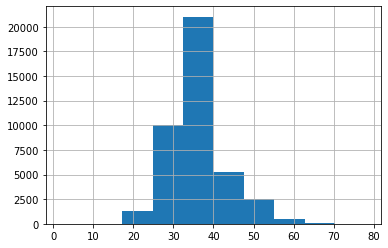

In [80]:
uof_df.off_age.hist();

In [81]:
print(uof_df['off_age'].quantile(0.95))
print(uof_df['off_age'].quantile(0.50)) 
print(uof_df['off_age'].quantile(0.05))

50.0
34.0
25.0


In [82]:
#Replace outliers with median value
print(uof_df['off_age'].quantile(0.50)) 
print(uof_df['off_age'].quantile(0.05)) 
uof_df['off_age'] = np.where(uof_df['off_age'] < 25, 34, uof_df['off_age'])
uof_df['off_age'] = np.where(uof_df['off_age'] > 50, 34, uof_df['off_age'])
uof_df['off_age'].describe()

34.0
25.0


count    40744.000000
mean        34.785097
std          5.114208
min         25.000000
25%         33.000000
50%         34.000000
75%         36.000000
max         50.000000
Name: off_age, dtype: float64

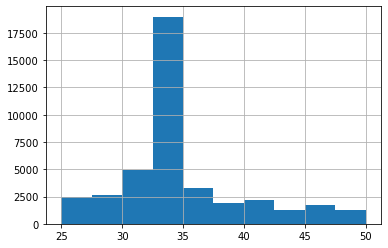

In [83]:
uof_df.off_age.hist();

In [84]:
uof_df['off_yr_employ'].describe()

count    27623.000000
mean         8.540528
std          7.562910
min          0.000000
25%          2.000000
50%          7.000000
75%         13.000000
max         46.000000
Name: off_yr_employ, dtype: float64

In [85]:
uof_df['off_yr_employ'].median()

7.0

In [86]:
# recategorize NaN values using median value of 34
uof_df['off_yr_employ'] = uof_df['off_yr_employ'].replace(np.NaN, 7.0)

# convert to int
uof_df['off_yr_employ'] = uof_df['off_yr_employ'].astype(np.int64)

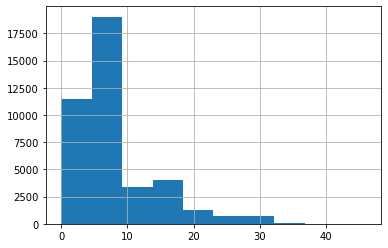

In [87]:
uof_df.off_yr_employ.hist();

In [88]:
print(uof_df['off_yr_employ'].quantile(0.95))
print(uof_df['off_yr_employ'].quantile(0.50))

20.0
7.0


In [89]:
#Replace outliers with median value 
uof_df['off_yr_employ'] = np.where(uof_df['off_yr_employ'] > 20, 7, uof_df['off_yr_employ'])
uof_df['off_yr_employ'].describe()

count    40744.000000
mean         7.126988
std          4.621487
min          0.000000
25%          3.000000
50%          7.000000
75%          8.000000
max         20.000000
Name: off_yr_employ, dtype: float64

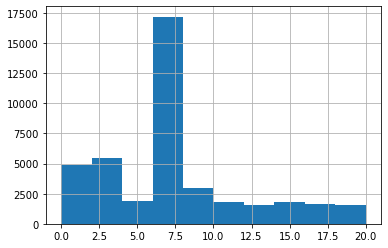

In [90]:
uof_df.off_yr_employ.hist();

In [91]:
uof_df.off_cond_type.value_counts().head(50)

no injuries noted or visible    21923
complaint of pain                2176
minor scrapes                    1201
minor bleeding                    494
swelling                          439
laceration                        423
bruising                          282
internal pain/discomfort          136
bite mark                         136
broken bone                        48
dislocated bone                    26
fractured bone                     21
none                               17
spit                               11
major bleeding                      9
exposure to blood                   8
blood exposure                      8
kicked                              7
spit on                             6
kick to thigh/no pain               6
pain/discomfort                     6
spat upon                           5
battery by bodily waste             5
pushed                              5
sprain to right thumb               5
redness                             5
kick to the 

In [92]:
# no injuries
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('no injuries noted or visible','no injuries').replace('none','no injuries').replace('no injury','no injuries').replace('no injury,just hurt feelings','no injuries').replace('no injuries noted or visible','no injuries').replace('kick no injury','no injuries').replace('struck but not injured','no injuries').replace('no injury/strike only','no injuries').replace('ofc pulled arm away b4 bite','no injuries').replace('head butt, nothing visible','no injuries')

# broken, fractured, or dislocated bone
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('broken bone', 'broken, fractured, or dislocated bone').replace('dislocated bone', 'broken, fractured, or dislocated bone').replace('fractured bone', 'broken, fractured, or dislocated bone').replace('broken tooth', 'broken, fractured, or dislocated bone')

# muscular injury
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('sprain to right thumb', 'muscular injury').replace('strained hamstring muscle', 'muscular injury').replace('strained ligament', 'muscular injury').replace('torn rotator cuff', 'muscular injury').replace('sprain/swelling', 'muscular injury').replace('ligament tear', 'muscular injury').replace('possible rotator cuff tear', 'muscular injury').replace('back strain', 'muscular injury').replace('strained hip/thigh muscle', 'muscular injury').replace('sprain to right hand', 'muscular injury').replace('pulled hamstring', 'muscular injury')

# complaint of pain
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('internal pain/discomfort','complaint of pain').replace('pain/discomfort','complaint of pain').replace('complaint of pain to arm','complaint of pain').replace('pain and tightness','complaint of pain').replace('discomfort','complaint of pain').replace('right knee','complaint of pain').replace('pain','complaint of pain').replace('pain to shoulder','complaint of pain').replace('pain to right knee','complaint of pain').replace('complaint of pain/swelling','complaint of pain')

# bruising and swelling
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('bruising','bruising and swelling').replace('redness','bruising and swelling').replace('bruised left eyebrow','bruising and swelling').replace('bruising and pain','bruising and swelling').replace('redness','bruising and swelling').replace('bruised left eyebrow','bruising and swelling').replace('swelling','bruising and swelling').replace('bruised & scratched left eye','bruising and swelling').replace('burning sensation and rednes','bruising and swelling').replace('head bump','bruising and swelling')

# physical assault
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('bite mark','physical assault').replace('kicked','physical assault').replace('kick to thigh/no pain','physical assault').replace('pushed','physical assault').replace('stirke to the neck','physical assault').replace('kick to the shen','physical assault').replace('kicked in groin with pain','physical assault').replace('pushed on and pulled upon','physical assault').replace('kick to the chest','physical assault').replace('pushed/ shoved at listed','physical assault').replace('hit with closed fist','physical assault').replace('(kicked) sudden short pain','physical assault').replace('slap to the face','physical assault').replace('officer kicked','physical assault').replace('contact','physical assault')

# injury due to weapon
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('taser probe stick', 'injury due to weapon').replace('knife wound', 'injury due to weapon').replace('needle stick', 'injury due to weapon').replace('gunshot wound', 'injury due to weapon')

# abrasions
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('minor scrapes', 'abrasions').replace('minor abrasion', 'abrasions').replace('scratch on right hand', 'abrasions').replace('minor scrape to finger', 'abrasions').replace('abrasion to forehead', 'abrasions').replace('abrasion', 'abrasions').replace('abrasion-right index finger', 'abrasions')

# exposure to bodily fluids
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('spit', 'exposure to bodily fluids').replace('exposure to blood', 'exposure to bodily fluids').replace('blood exposure', 'exposure to bodily fluids').replace('spit on', 'exposure to bodily fluids').replace('spat upon', 'exposure to bodily fluids').replace('human mucus(spit)', 'exposure to bodily fluids').replace('battery by bodily waste', 'exposure to bodily fluids').replace('spat on ** attempted', 'exposure to bodily fluids').replace('body fuid', 'exposure to bodily fluids').replace('body fluid', 'exposure to bodily fluids').replace("susp spit in officer's face", 'exposure to bodily fluids').replace('saliva on face', 'exposure to bodily fluids').replace('blood exsposure to hep c', 'exposure to bodily fluids').replace('blood on cheek', 'exposure to bodily fluids').replace('spit on face', 'exposure to bodily fluids')

# bleeding
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('minor bleeding', 'bleeding').replace('major bleeding', 'bleeding')

# lacerations
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace('laceration','lacerations').replace('minor cuts','lacerations')

In [93]:
# Replace NaN values with other crimes
uof_df['off_cond_type'] = uof_df['off_cond_type'].replace(np.NaN, 'other')

uof_df['off_cond_type'].value_counts()

no injuries                              21959
other                                    13155
complaint of pain                         2344
abrasions                                 1220
bruising and swelling                      738
bleeding                                   503
lacerations                                425
physical assault                           191
broken, fractured, or dislocated bone       97
exposure to bodily fluids                   66
muscular injury                             31
injury due to weapon                         9
concussion                                   3
cervical disc compression                    3
Name: off_cond_type, dtype: int64

In [94]:
# Reduce dimensionality 
off_cond_type_vc = pd.value_counts(uof_df['off_cond_type'])
off_cond_type_pct = (off_cond_type_vc/off_cond_type_vc.sum() * 100).lt(1)
uof_df['off_cond_type'] = np.where(uof_df['off_cond_type'].isin(off_cond_type_vc[off_cond_type_pct].index),'other',uof_df['off_cond_type'])

uof_df['off_cond_type'].value_counts()

no injuries              21959
other                    13555
complaint of pain         2344
abrasions                 1220
bruising and swelling      738
bleeding                   503
lacerations                425
Name: off_cond_type, dtype: int64

In [95]:
#Replace NaN values with no values
uof_df['off_injured'] = uof_df['off_injured'].replace(np.NaN, 'no')

uof_df['off_injured'].isna().value_counts()

False    40744
Name: off_injured, dtype: int64

In [96]:
uof_df['off_hospital'] = uof_df['off_hospital'].replace(np.NaN, 'no')

uof_df['off_hospital'].isna().value_counts()

False    40744
Name: off_hospital, dtype: int64

## EDA

Now that the data has been cleaned, I will explore and analyze the data.

In [97]:
uof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40744 entries, 0 to 99657
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   disposition     40744 non-null  object        
 1   uof_force_type  40744 non-null  object        
 2   uof_reason      40744 non-null  object        
 3   service_type    40744 non-null  object        
 4   cit_arrested    40744 non-null  bool          
 5   citcharge_type  40744 non-null  object        
 6   cit_injured     40744 non-null  object        
 7   cit_hospital    40744 non-null  object        
 8   off_injured     40744 non-null  object        
 9   off_hospital    40744 non-null  object        
 10  citnum          40744 non-null  object        
 11  race            40744 non-null  object        
 12  sex             40744 non-null  object        
 13  cit_age         40744 non-null  int64         
 14  cit_cond_type   40744 non-null  object        
 15  of

In [98]:
# Drop Datetime
uof_df = uof_df.drop(uof_df[['datetime']], axis=1)

### Race and Use of Force

#### Civilian Use of Force Data

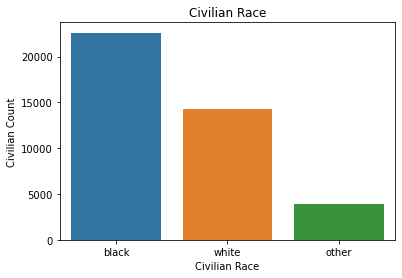

In [99]:
civilian_race = sns.countplot(x=uof_df['race'], 
                    data=uof_df)

civilian_race.set(xlabel="Civilian Race", 
                  ylabel="Civilian Count", 
                  title='Civilian Race');

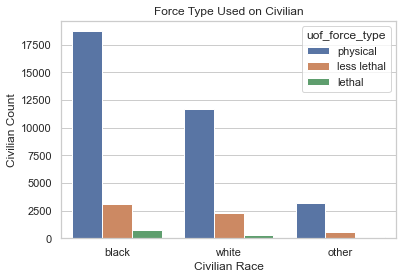

In [100]:
sns.set(style="whitegrid")

race_use_of_force = sns.countplot(x=uof_df['race'], 
                    hue=uof_df['uof_force_type'], 
                    data=uof_df)

race_use_of_force.set(xlabel="Civilian Race", 
                      ylabel="Civilian Count", 
                      title='Force Type Used on Civilian');

#### Uniformed Officer and Race Data

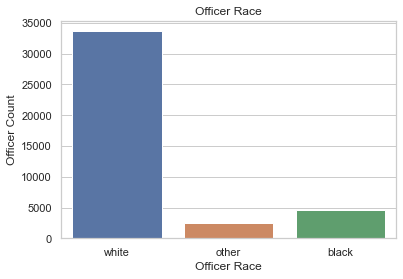

In [101]:
off_race = sns.countplot(x=uof_df['off_race'], 
                    data=uof_df)

off_race.set(xlabel="Officer Race", 
                  ylabel="Officer Count", 
                  title='Officer Race');

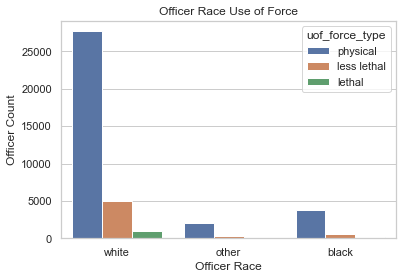

In [102]:
off_race_use_of_force = sns.countplot(x='off_race', 
                    hue='uof_force_type', 
                    data=uof_df)

off_race_use_of_force.set(xlabel="Officer Race", 
                          ylabel="Officer Count", 
                          title='Officer Race Use of Force');

#### Injury and Use of Force

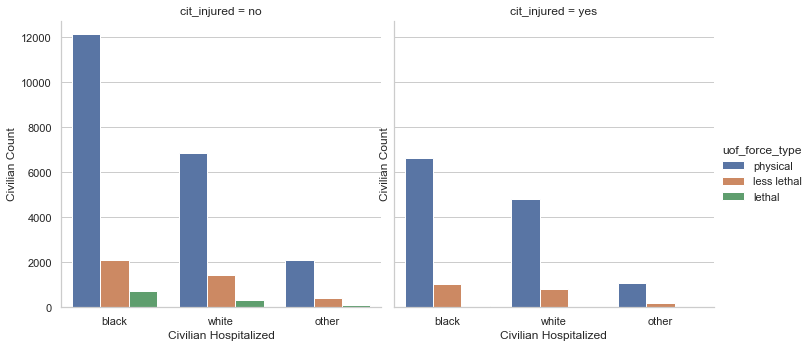

In [103]:
race_hosp_use_of_force = sns.catplot(x='race', 
                    hue='uof_force_type',
                    col='cit_injured',
                    kind='count',
                    data=uof_df)

race_hosp_use_of_force.set(xlabel="Civilian Hospitalized", 
                           ylabel="Civilian Count");

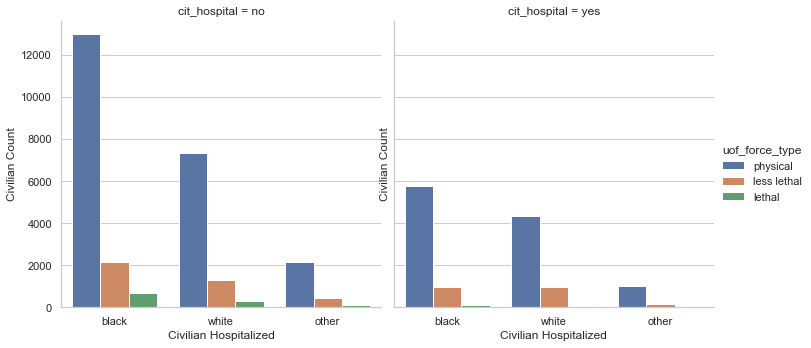

In [104]:
race_hosp_use_of_force = sns.catplot(x='race', 
                    hue='uof_force_type',
                    col='cit_hospital',
                    kind='count',
                    data=uof_df)

race_hosp_use_of_force.set(xlabel="Civilian Hospitalized", 
                           ylabel="Civilian Count");

### Sex and Use of Force

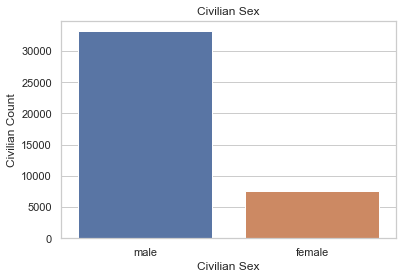

In [105]:
# Let's look at civilian sex
civilian_race = sns.countplot(x=uof_df['sex'], 
                    data=uof_df)

civilian_race.set(xlabel="Civilian Sex", 
                  ylabel="Civilian Count", 
                  title='Civilian Sex');

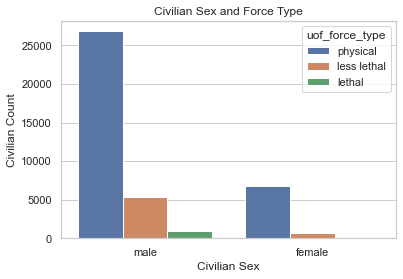

In [106]:
race_use_of_force = sns.countplot(x=uof_df['sex'], 
                    hue=uof_df['uof_force_type'], 
                    data=uof_df)

race_use_of_force.set(xlabel="Civilian Sex", 
                      ylabel="Civilian Count", 
                      title='Civilian Sex and Force Type');

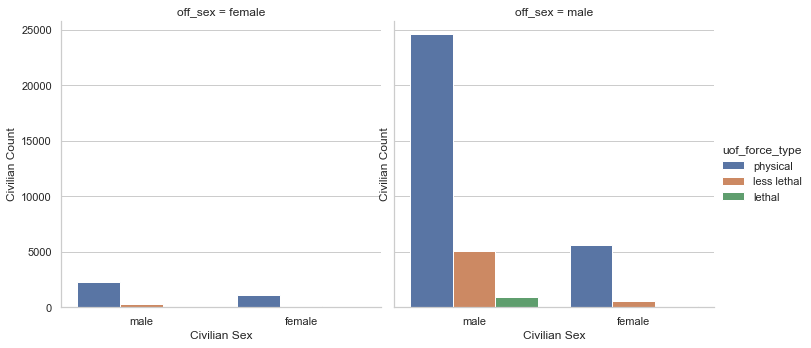

In [107]:
race_hosp_use_of_force = sns.catplot(x='sex', 
                    hue='uof_force_type',
                    col='off_sex',
                    kind='count',
                    data=uof_df)

race_hosp_use_of_force.set(xlabel="Civilian Sex", 
                           ylabel="Civilian Count");

### Age and Use of Force

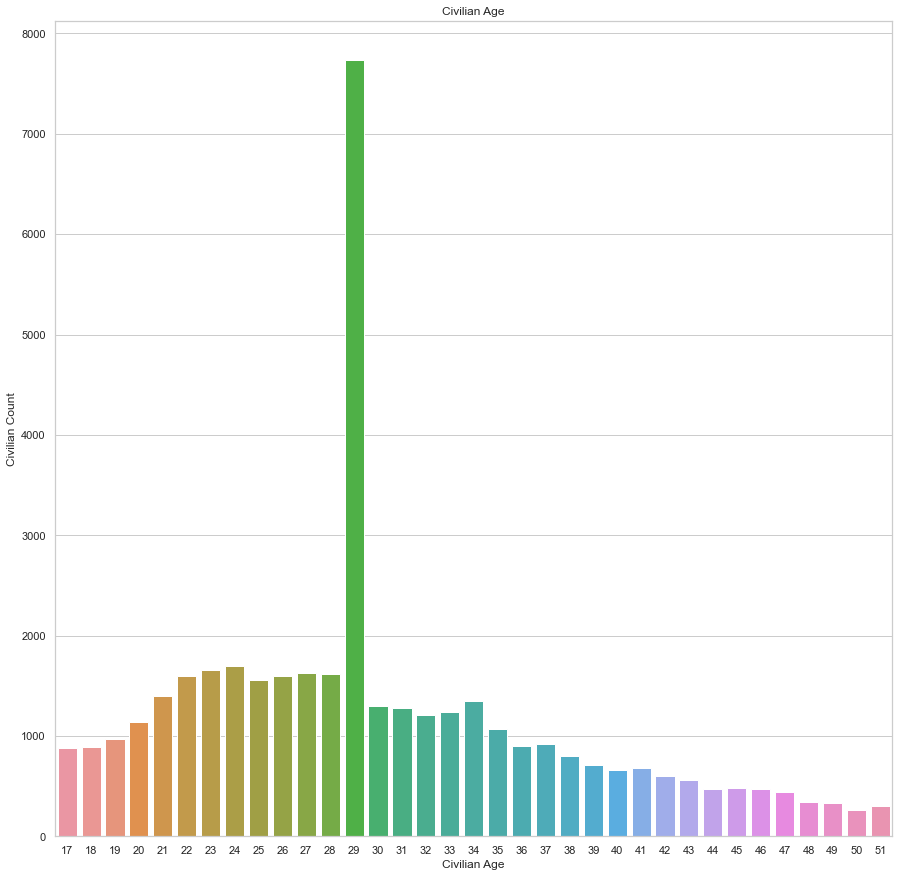

In [108]:
fig_dims = (15, 15)
fig, ax = plt.subplots(figsize=fig_dims)

civilian_race = sns.countplot(x=uof_df['cit_age'], 
                    data=uof_df, ax=ax)

civilian_race.set(xlabel="Civilian Age", 
                  ylabel="Civilian Count", 
                  title='Civilian Age');

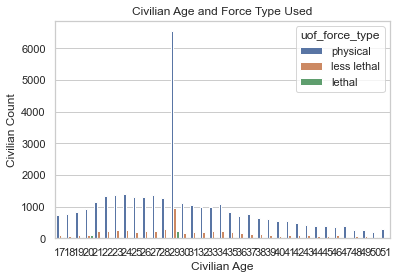

In [109]:
race_use_of_force = sns.countplot(x=uof_df['cit_age'], 
                    hue=uof_df['uof_force_type'], 
                    data=uof_df)

race_use_of_force.set(xlabel="Civilian Age", 
                      ylabel="Civilian Count", 
                      title='Civilian Age and Force Type Used');

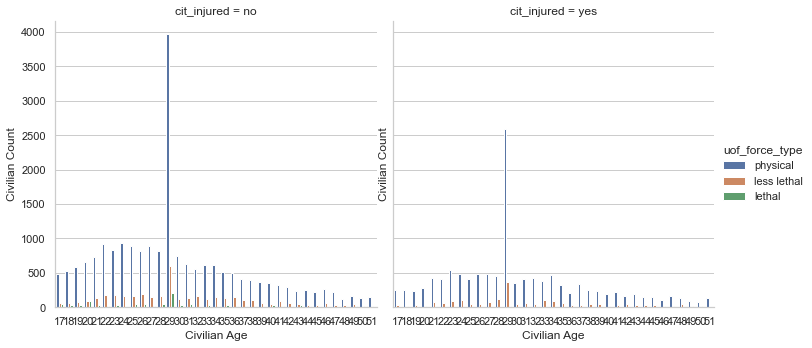

In [110]:
race_hosp_use_of_force = sns.catplot(x='cit_age', 
                    hue='uof_force_type',
                    col='cit_injured',
                    kind='count',
                    data=uof_df)

race_hosp_use_of_force.set(xlabel="Civilian Age", 
                           ylabel="Civilian Count");

### Geoencoding 

In [114]:
from geopy.geocoders import ArcGIS #Used for Geoencoding
from geopy.extra.rate_limiter import RateLimiter
import folium #Used for creating Leaflet.js maps
from folium import plugins #Used for more advanced mapping options

In [112]:
#geolocator = ArcGIS(timeout=10)
#latitudes = []
#longitudes = []
#for i in uof_df["address"]:
    #location = geolocator.geocode(i)
    #try:
        #latitudes.append(location.latitude)
        #longitudes.append(location.longitude)
    #except:
        #print(i)
        #continue


In [113]:
uof_df["latitude"] = latitudes
uof_df["longitude"] = longitudes

NameError: name 'latitudes' is not defined

### Use of Force by Month and Day

In [ ]:
race_use_of_force = sns.countplot(x=uof_df['occurred_wd'], 
                    hue=uof_df['uof_force_type'], 
                    data=uof_df)

race_use_of_force.set(xlabel="Day of the Week", 
                      ylabel="Incident Count", 
                      title='Use of Force by Day');

In [ ]:
race_use_of_force = sns.countplot(x=uof_df['occurred_month'], 
                    hue=uof_df['uof_force_type'], 
                    data=uof_df)

race_use_of_force.set(xlabel="Month", 
                      ylabel="Incident Count", 
                      title='Use of Force by Month');

### Uniformed Officer Visuals